# Read NYC Taxi data

Note: Data are in local time zone (EST, EDT)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def count_by_hour(color, filename):
    if color == 'green':
        df_input = pd.read_csv('nyc_taxi/' + filename, 
                         parse_dates = ['lpep_pickup_datetime','lpep_dropoff_datetime'])
        df_tmp = df_input.loc[:,['lpep_pickup_datetime','passenger_count']]
        df_tmp.columns = ['time_stamp', 'passenger_count']
    elif color == 'yellow':
        df_input = pd.read_csv('nyc_taxi/' + filename,
                         parse_dates = ['tpep_pickup_datetime','tpep_dropoff_datetime'])
        df_tmp = df_input.loc[:,['tpep_pickup_datetime','passenger_count']]
        df_tmp.columns = ['time_stamp', 'passenger_count']
    df_out = df_tmp.set_index('time_stamp').resample('1H').sum()
    df_out.reset_index(level=0, inplace=True)
#     df_nyc.to_csv('nyc_taxi/' + output_filename, index = False)
    return df_out

In [38]:
df_test05 = count_by_hour('green', filename)

In [85]:
df_test05

,time_stamp,passenger_count
0,2017-05-01 00:00:00,1059
1,2017-05-01 01:00:00,681
2,2017-05-01 02:00:00,546
3,2017-05-01 03:00:00,329
4,2017-05-01 04:00:00,408
5,2017-05-01 05:00:00,401
6,2017-05-01 06:00:00,621
7,2017-05-01 07:00:00,1562
8,2017-05-01 08:00:00,2347
9,2017-05-01 09:00:00,2204


In [3]:
!ls nyc_taxi/

green_tripdata_2017-01.csv total_by_hour_2017-01.csv
green_tripdata_2017-02.csv total_by_hour_2017-02.csv
green_tripdata_2017-03.csv total_by_hour_2017-03.csv
green_tripdata_2017-04.csv total_by_hour_2017-04.csv
green_tripdata_2017-05.csv total_by_hour_2017-05.csv
green_tripdata_2017-06.csv total_by_hour_2017-06.csv


In [70]:
for i in range(1, 7):
    month = str(i).zfill(2)
    filename = 'green' + '_tripdata_2017-' + month + '.csv'
    df_green = count_by_hour('green', filename)
    filename = 'yellow' + '_tripdata_2017-' + month + '.csv'
    df_yellow = count_by_hour('yellow', filename)
    df_by_month = df_green.merge(df_yellow, on = 'time_stamp')
    df_by_month['passenger_count'] = df_by_month.passenger_count_x + df_by_month.passenger_count_y
    df_by_month.drop(['passenger_count_x','passenger_count_y'], axis = 1, inplace = True)
    output_filename = 'total_by_hour_2017-' + month + '.csv'
    df_by_month.to_csv('nyc_taxi/' + output_filename, index = False)  

In [47]:
df_green.shape

(744, 2)

In [48]:
df_yellow.shape

(744, 2)

In [54]:
df_by_month = df_green.merge(df_yellow, on = 'time_stamp')

In [55]:
df_by_month.shape

(744, 3)

In [56]:
df_by_month.head()

,time_stamp,passenger_count_x,passenger_count_y
0,2017-01-01 00:00:00,5892,36822
1,2017-01-01 01:00:00,5905,41123
2,2017-01-01 02:00:00,5530,37704
3,2017-01-01 03:00:00,4993,31199
4,2017-01-01 04:00:00,4062,22346


In [57]:
df_by_month['passenger_count'] = df_by_month.passenger_count_x + df_by_month.passenger_count_y

In [59]:
df_by_month.drop(['passenger_count_x','passenger_count_y'], axis = 1, inplace = True)

In [60]:
df_by_month.head()

,time_stamp,passenger_count
0,2017-01-01 00:00:00,42714
1,2017-01-01 01:00:00,47028
2,2017-01-01 02:00:00,43234
3,2017-01-01 03:00:00,36192
4,2017-01-01 04:00:00,26408


In [75]:
df_t = pd.DataFrame()
for i in range(1, 7):
    month = str(i).zfill(2)
    filename = 'total_by_hour_2017-' + month + '.csv'
    df_t = pd.concat([df_t, pd.read_csv('nyc_taxi/' + filename, 
                         parse_dates = ['time_stamp'])], axis = 0)

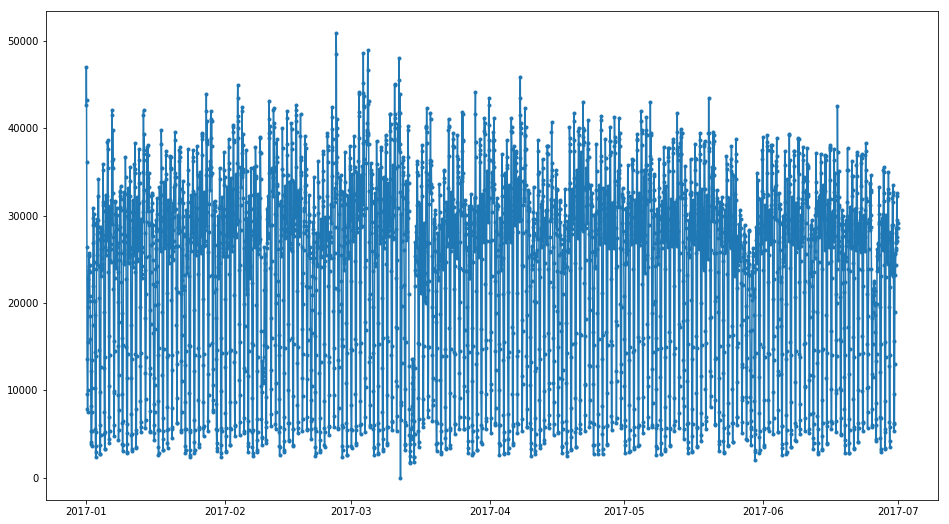

In [76]:
fig, ax = plt.subplots(figsize = (16, 9))
# ax.plot(df_by_month.loc[:,'time_stamp'], df_by_month.loc[:,'passenger_count'], '.-', label = 'total');
# ax.plot(df_yellow.loc[:,'time_stamp'], df_yellow.loc[:,'passenger_count'], '.-', label = 'yellow');
# ax.plot(df_green.loc[:,'time_stamp'], df_green.loc[:,'passenger_count'], '.-', label = 'green');
ax.plot(df_t.loc[:,'time_stamp'], df_t.loc[:,'passenger_count'], '.-');
#ax.legend();
#ax.set_xlim(pd.datetime(2017,1,21), pd.datetime(2017,1,28));

In [80]:
df_t.iloc[740:760,:]

,time_stamp,passenger_count
740,2017-01-31 20:00:00,33500
741,2017-01-31 21:00:00,34448
742,2017-01-31 22:00:00,29997
743,2017-01-31 23:00:00,20412
0,2017-02-01 00:00:00,12616
1,2017-02-01 01:00:00,7377
2,2017-02-01 02:00:00,4766
3,2017-02-01 03:00:00,2978
4,2017-02-01 04:00:00,3098
5,2017-02-01 05:00:00,5720


In [81]:
df_t.to_csv('nyc_taxi_2017.csv', index = False)

In [82]:
df_t.shape

(4344, 2)

In [83]:
df_t.dtypes

time_stamp         datetime64[ns]
passenger_count             int64
dtype: object

In [40]:
df_green03 = pd.read_csv('nyc_taxi/green_tripdata_2017-02.csv', 
                         parse_dates = ['lpep_pickup_datetime','lpep_dropoff_datetime'])

df_green03_tmp = df_green03.loc[:,['lpep_pickup_datetime','passenger_count']]

# df_green03_tmp.head()

# df_green03_tmp.lpep_pickup_datetime.dtype

df_green03_tmp.set_index('lpep_pickup_datetime', inplace = True)

df_green03_tmp.set_index(df_green03_tmp.index.tz_localize('US/Eastern'), inplace = True)

#df_green03_tmp.head()

df_green03_tmp.reset_index(level=0, inplace=True)

#df_green03_tmp.head()

#df_green03_tmp.lpep_pickup_datetime.dtype

In [41]:
df_green03_tmp.head()

,lpep_pickup_datetime,passenger_count
0,2017-02-01 00:00:15-05:00,1
1,2017-02-01 00:03:19-05:00,1
2,2017-02-01 00:31:47-05:00,1
3,2017-02-01 00:44:14-05:00,1
4,2017-02-01 00:03:17-05:00,1


In [2]:
from datetime import datetime
from datetime import timezone

dt = datetime.now()
dt.replace(tzinfo=timezone.utc)


datetime.datetime(2018, 1, 24, 17, 40, 53, 59321, tzinfo=datetime.timezone.utc)

In [4]:
from pytz import all_timezones

print(len(all_timezones))
for zone in all_timezones:
    if 'US' in zone:
        print(zone)

592
US/Alaska
US/Aleutian
US/Arizona
US/Central
US/East-Indiana
US/Eastern
US/Hawaii
US/Indiana-Starke
US/Michigan
US/Mountain
US/Pacific
US/Pacific-New
US/Samoa


In [42]:
df_green06 = pd.read_csv('nyc_taxi/green_tripdata_2017-06.csv', 
                         parse_dates = ['lpep_pickup_datetime','lpep_dropoff_datetime'])

df_green06_tmp = df_green06.loc[:,['lpep_pickup_datetime','passenger_count']]

# df_green03_tmp.head()

# df_green03_tmp.lpep_pickup_datetime.dtype

df_green06_tmp.set_index('lpep_pickup_datetime', inplace = True)

df_green06_tmp.set_index(df_green06_tmp.index.tz_localize('US/Eastern'), inplace = True)

#df_green03_tmp.head()

df_green06_tmp.reset_index(level=0, inplace=True)

#df_green03_tmp.head()

#df_green03_tmp.lpep_pickup_datetime.dtype

In [43]:
df_green06_tmp.head()

,lpep_pickup_datetime,passenger_count
0,2017-06-01 00:33:45-04:00,1
1,2017-06-01 00:33:55-04:00,1
2,2017-06-01 00:12:07-04:00,1
3,2017-06-01 00:17:26-04:00,1
4,2017-06-01 00:17:22-04:00,3


In [ ]:
date_str = "2014-05-28 22:28:15"
datetime_obj_naive = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")

datetime_obj_pacific = timezone('US/Pacific').localize(datetime_obj_naive)
print datetime_obj_pacific.strftime("%Y-%m-%d %H:%M:%S %Z%z")

In [34]:
# df_yellow01 = pd.read_csv('nyc_taxi/yellow_tripdata_2017-01.csv',
#                          parse_dates = ['tpep_pickup_datetime','tpep_dropoff_datetime'])
# df_yellow01.head()